In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
sns.set()
font_titlesize = 18
font_axeslabelsize = 14
font_legendsize = 10

In [2]:
def perform_statistical_test(testname, x, y, sidedness):
    if testname == 'ttest':
        statistic, pval = st.ttest_ind(x, y, alternative = sidedness)
    elif testname ==  'utest':
        statistic, pval = st.mannwhitneyu(x, y, alternative = sidedness)
    elif testname == 'ks':
        statistic, pval = st.kstest(x, y, alternative = sidedness)
    elif testname == 'kw':
        if x.shape[1] == 2:
            statistic, pval = st.kruskal(x.iloc[:, 0], x.iloc[:, 1], nan_policy = 'omit')
        elif x.shape[1] == 3:
            statistic, pval = st.kruskal(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2], nan_policy = 'omit')
        elif x.shape[1] == 4:
            statistic, pval = st.kruskal(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2], x.iloc[:, 3], nan_policy = 'omit')
        elif x.shape[1] == 5:
            statistic, pval = st.kruskal(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2], x.iloc[:, 3], x.iloc[:, 4], nan_policy = 'omit')
        elif x.shape[1] == 6:
            statistic, pval = st.kruskal(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2], x.iloc[:, 3], x.iloc[:, 4], x.iloc[:, 5], nan_policy = 'omit')
        elif x.shape[1] == 7:
            statistic, pval = st.kruskal(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2], x.iloc[:, 3], x.iloc[:, 4], x.iloc[:, 5], x.iloc[:, 6], nan_policy = 'omit')
    if pval < 0.005:
        issignificant = 1
    else:
        issignificant = 0
    return statistic, pval, issignificant

In [3]:
# Loading data
df = pd.read_csv('movieReplicationSet.csv')
movie_col_count = 400
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


### Q1. Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies] 

N_popular = 200, N_unpopular = 200
test = Mann-Whitney U test, U_popular = 33427.5, U_unpopular = 6572.5, pval = 9.929258851707232e-35
Movies that are more popular are rated higher than movies that are less popular.


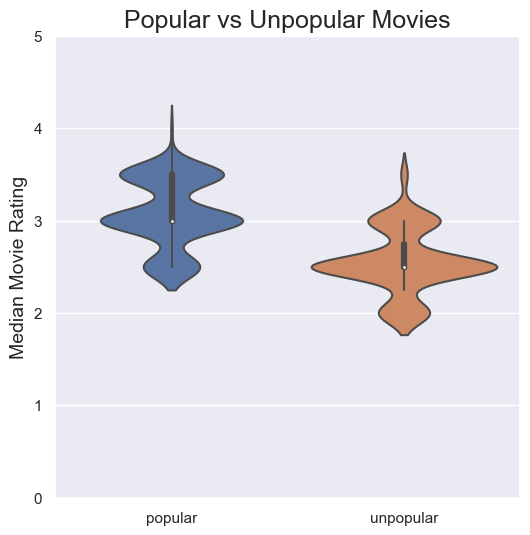

In [4]:
movies_popularity = df.count().iloc[0:movie_col_count]
top_idx = np.where(movies_popularity > np.median(movies_popularity))[0]
bottom_idx = np.delete(np.arange(movie_col_count), top_idx)
movies_rating_popular = df.iloc[:, top_idx]
movies_rating_unpopular = df.iloc[:, bottom_idx]


movies_rating_popular_median = movies_rating_popular.median(skipna = True, axis = 0)
movies_rating_unpopular_median = movies_rating_unpopular.median(skipna = True, axis = 0)
nx, ny = movies_rating_popular_median.shape[0], movies_rating_unpopular_median.shape[0]
print(f'N_popular = {nx}, N_unpopular = {ny}')
U_popular, pval, issignificant = perform_statistical_test('utest', movies_rating_popular_median, movies_rating_unpopular_median, 'greater')
U_unpopular = nx*ny - U_popular
print(f'test = Mann-Whitney U test, U_popular = {round(U_popular, 4)}, U_unpopular = {round(U_unpopular, 4)}, pval = {pval}')
if issignificant:
    print('Movies that are more popular are rated higher than movies that are less popular.')
else:
    print('Movies that are more popular are not rated higher than movies that are less popular.')

data = {
    'popular' : movies_rating_popular_median,
    'unpopular' : movies_rating_unpopular_median
}
maxsize = max([a.size for a in data.values()])
data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in data.items()}
df_temp = pd.DataFrame(data_pad)

fig, ax = plt.subplots(figsize = (6, 6))
sns.violinplot(data=df_temp)
plt.title('Popular vs Unpopular Movies', fontsize=font_titlesize)
plt.ylabel('Median Movie Rating', fontsize=font_axeslabelsize)
plt.ylim([0, 5])
plt.show()

### Q2. Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new] 

N_newer = 203, N_older = 197
test = Mann-Whitney U test, U_newer = 21863.5, U_older = 18127.5, pval = 0.08873661144000093
Movies that are newer are not rated differently than movies that are older.


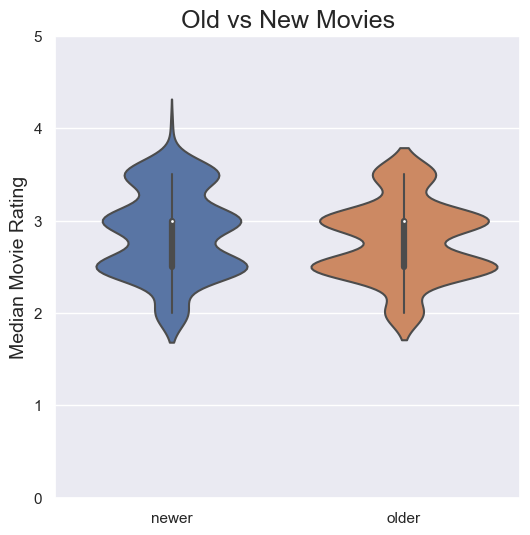

In [5]:
movies_year = np.zeros((movie_col_count, ), dtype='int')
for ii in range(movie_col_count):
    mv_name = df.columns[ii]
    movies_year[ii] = int(mv_name[-5:-1])
newer_idx = np.where(movies_year >= np.median(movies_year))[0]
older_idx = np.delete(np.arange(movie_col_count), newer_idx)

movies_rating_newer = df.iloc[:, newer_idx]
movies_rating_older = df.iloc[:, older_idx]

movies_rating_newer_median = movies_rating_newer.median(skipna = True, axis = 0)
movies_rating_older_median = movies_rating_older.median(skipna = True, axis = 0)
nx, ny = movies_rating_newer_median.shape[0], movies_rating_older_median.shape[0]
print(f'N_newer = {nx}, N_older = {ny}')
U_newer, pval, issignificant =  perform_statistical_test('utest', movies_rating_newer_median, movies_rating_older_median, 'two-sided')
U_older = nx*ny - U_newer
print(f'test = Mann-Whitney U test, U_newer = {round(U_newer, 4)}, U_older = {round(U_older, 4)}, pval = {pval}')
if issignificant:
    print('Movies that are newer are rated differently than movies that are older.')
else:
    print('Movies that are newer are not rated differently than movies that are older.')
data = {
    'newer' : movies_rating_newer_median,
    'older' : movies_rating_older_median
}
maxsize = max([a.size for a in data.values()])
data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in data.items()}
df_temp = pd.DataFrame(data_pad)
fig, ax = plt.subplots(figsize = (6, 6))
sns.violinplot(data=df_temp)
plt.title('Old vs New Movies', fontsize=font_titlesize)
plt.ylabel('Median Movie Rating', fontsize=font_axeslabelsize)
plt.ylim([0, 5])
plt.show()

### Q3. Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

N_female = 743, N_male = 241
test = Mann-Whitney-U-test, U_female = 96830.5, U_male = 82232.5, pval = 0.0505
Enjoyment of Shrek (2001) is not gendered.


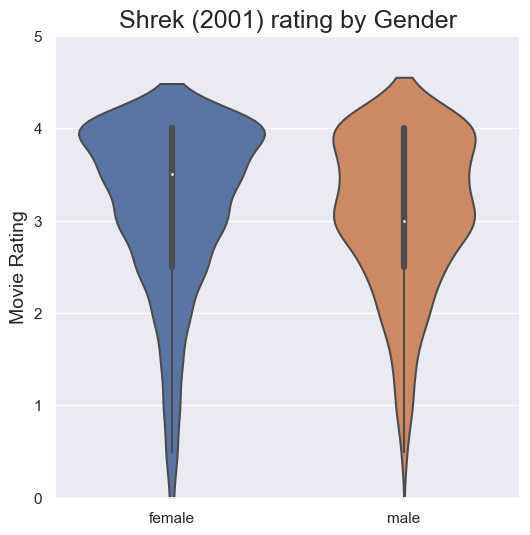

In [6]:
female_df = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]
male_df = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]

shrek_rating_female = female_df['Shrek (2001)'].dropna()
shrek_rating_male = male_df['Shrek (2001)'].dropna()
nx, ny = shrek_rating_female.shape[0], shrek_rating_male.shape[0]
print(f'N_female = {nx}, N_male = {ny}')
U_female, pval, issignificant = perform_statistical_test('utest', shrek_rating_female, shrek_rating_male, 'two-sided')
U_male = nx*ny - U_female
print(f'test = Mann-Whitney-U-test, U_female = {round(U_female, 4)}, U_male = {round(U_male, 4)}, pval = {round(pval, 4)}')
if issignificant:
    print('Enjoyment of Shrek (2001) is gendered.')
else:
    print('Enjoyment of Shrek (2001) is not gendered.')

data = {
    'female' : shrek_rating_female,
    'male' : shrek_rating_male
}
maxsize = max([a.size for a in data.values()])
data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in data.items()}
df_temp = pd.DataFrame(data_pad)

fig, ax = plt.subplots(figsize = (6, 6))
sns.violinplot(data=df_temp)
plt.title('Shrek (2001) rating by Gender', fontsize=font_titlesize)
plt.ylabel('Movie Rating', fontsize=font_axeslabelsize)
plt.ylim([0, 5])
plt.show()

### Q4. What proportion of movies are rated differently by male and female viewers?

In [7]:
female_df = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]
male_df = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]
different_rating_count = 0
for idx in range(movie_col_count):
    movie_rating_female = female_df.iloc[:, idx].dropna()
    movie_rating_male = male_df.iloc[:, idx].dropna()
    nx, ny = movie_rating_female.shape[0], movie_rating_male.shape[0]
    U_female, pval, issignificant = perform_statistical_test('utest', movie_rating_female, movie_rating_male, 'two-sided')
    
    if issignificant:
        different_rating_count += 1
proportion_different = round(different_rating_count/movie_col_count, 4)
print(f'Proportion of movies that are rated differently by male and female vieweres = {proportion_different}')

Proportion of movies that are rated differently by male and female vieweres = 0.125


### Q5. Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

N_onlychild = 151, N_siblings = 776
test = Mann-Whitney-U-test, U_onlychild = 52929.0, U_siblings = 64247.0, pval = 0.978419092554931
People who are only child do not enjoy "The Lion King (1994)" more than people with siblings.


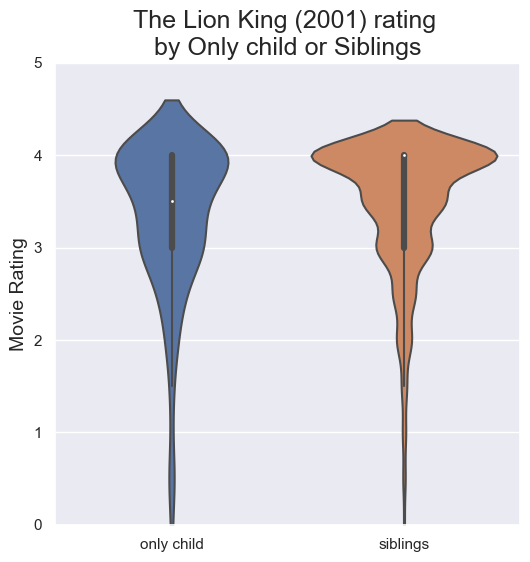

In [8]:
onlychild_df = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1]
siblings_df = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0]
lionking_rating_onlychild = onlychild_df['The Lion King (1994)'].dropna()
lionking_rating_siblings = siblings_df['The Lion King (1994)'].dropna()
nx, ny = lionking_rating_onlychild.shape[0], lionking_rating_siblings.shape[0]
print(f'N_onlychild = {nx}, N_siblings = {ny}')
U_onlychild, pval, issignificant = perform_statistical_test('utest', lionking_rating_onlychild, lionking_rating_siblings, 'greater')
U_siblings = nx*ny - U_onlychild
print(f'test = Mann-Whitney-U-test, U_onlychild = {round(U_onlychild, 4)}, U_siblings = {round(U_siblings, 4)}, pval = {pval}')
if issignificant:
    print('People who are only child enjoy "The Lion King (1994)" more than people with siblings.')
else:
    print('People who are only child do not enjoy "The Lion King (1994)" more than people with siblings.')

data = {
    'only child' : lionking_rating_onlychild,
    'siblings' : lionking_rating_siblings
}
maxsize = max([a.size for a in data.values()])
data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in data.items()}
df_temp = pd.DataFrame(data_pad)

fig, ax = plt.subplots(figsize = (6, 6))
sns.violinplot(data=df_temp)
plt.title('The Lion King (2001) rating \nby Only child or Siblings', fontsize=font_titlesize)
plt.ylabel('Movie Rating', fontsize=font_axeslabelsize)
plt.ylim([0, 5])
plt.show()

### Q6. What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [9]:
onlychild_df = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1]
siblings_df = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0]
different_rating_count = 0
for idx in range(movie_col_count):
    movie_rating_onlychild = onlychild_df.iloc[:, idx].dropna()
    movie_rating_siblings = siblings_df.iloc[:, idx].dropna()
    nx, ny = movie_rating_onlychild.shape[0], movie_rating_siblings.shape[0]
    U_onlychild, pval, issignificant = perform_statistical_test('utest', movie_rating_onlychild, movie_rating_siblings, 'two-sided')
    
    if issignificant:
        different_rating_count += 1
proportion_different = round(different_rating_count/movie_col_count, 4)
print(f'Proportion of movies that exhibit the "only child effect" = {proportion_different}')

Proportion of movies that exhibit the "only child effect" = 0.0175


### Q7. Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

N_bestalone = 393, N_notbestalone = 270
test = Mann-Whitney-U-test, U_bestalone = 56806.5, U_notbestalone = 49303.5, pval = 0.9436657996253056
People who like to watch movies socially do not enjoy "The Wolf of Wall Street (2013)" more than those who prefer to watch them alone.


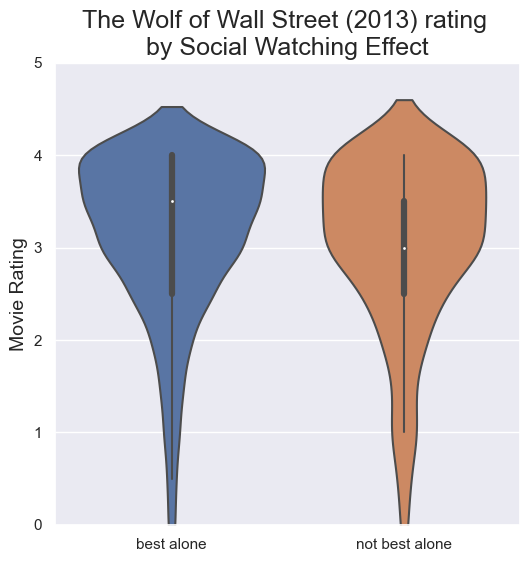

In [10]:
bestalone_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]
notbestalone_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]
wws_rating_bestalone = bestalone_df['The Wolf of Wall Street (2013)'].dropna()
wws_rating_notbestalone = notbestalone_df['The Wolf of Wall Street (2013)'].dropna()
nx, ny = wws_rating_bestalone.shape[0], wws_rating_notbestalone.shape[0]
print(f'N_bestalone = {nx}, N_notbestalone = {ny}')
U_bestalone, pval, issignificant = perform_statistical_test('utest', wws_rating_bestalone, wws_rating_notbestalone, 'less')
U_notbestalone = nx*ny - U_bestalone
print(f'test = Mann-Whitney-U-test, U_bestalone = {round(U_bestalone, 4)}, U_notbestalone = {round(U_notbestalone, 4)}, pval = {pval}')
if issignificant:
    print('People who like to watch movies socially enjoy "The Wolf of Wall Street (2013)" more than those who prefer to watch them alone.')
else:
    print('People who like to watch movies socially do not enjoy "The Wolf of Wall Street (2013)" more than those who prefer to watch them alone.')

data = {
    'best alone' : wws_rating_bestalone,
    'not best alone' : wws_rating_notbestalone
}
maxsize = max([a.size for a in data.values()])
data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in data.items()}
df_temp = pd.DataFrame(data_pad)

fig, ax = plt.subplots(figsize = (6, 6))
sns.violinplot(data=df_temp)
plt.title('The Wolf of Wall Street (2013) rating \nby Social Watching Effect', fontsize=font_titlesize)
plt.ylabel('Movie Rating', fontsize=font_axeslabelsize)
plt.ylim([0, 5])
plt.show()

### Q8. What proportion of movies exhibit such a “social watching” effect?

In [11]:
bestalone_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]
notbestalone_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]
different_rating_count = 0
for idx in range(movie_col_count):
    movie_rating_bestalone = bestalone_df.iloc[:, idx].dropna()
    movie_rating_notbestalone = notbestalone_df.iloc[:, idx].dropna()
    nx, ny = movie_rating_bestalone.shape[0], movie_rating_notbestalone.shape[0]
    U_bestalone, pval, issignificant = perform_statistical_test('utest', movie_rating_bestalone, movie_rating_notbestalone, 'less')
    
    if issignificant:
        different_rating_count += 1
proportion_different = round(different_rating_count/movie_col_count, 4)
print(f'Proportion of movies that exhibit the "social watching effect" = {proportion_different}')

Proportion of movies that exhibit the "social watching effect" = 0.015


### Q9. Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

N_homealone = 857, N_findingnemo = 1014
test = KS test, statistic = 0.1527, pval = 6.379381467525036e-10
Ratings distribution of "Home Alone (1990) is different than that of "Finding Nemo (2003)"


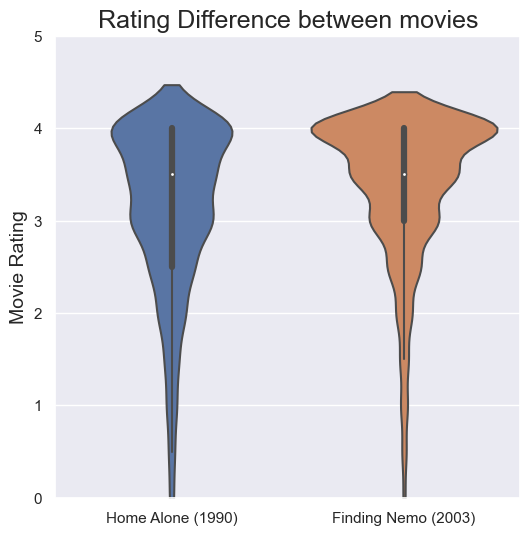

In [12]:
ratings_home_alone = df['Home Alone (1990)'].dropna().to_numpy()
ratings_finding_nemo = df['Finding Nemo (2003)'].dropna().to_numpy()
nx, ny = ratings_home_alone.shape[0], ratings_finding_nemo.shape[0]
print(f'N_homealone = {nx}, N_findingnemo = {ny}')
statistic, pval, issignificant = perform_statistical_test('ks', ratings_home_alone, ratings_finding_nemo, 'two-sided')
print(f'test = KS test, statistic = {round(statistic, 4)}, pval = {pval}')

if issignificant:
    print('Ratings distribution of "Home Alone (1990) is different than that of "Finding Nemo (2003)"')
else:
    print('Ratings distribution of "Home Alone (1990) is not different from that of "Finding Nemo (2003)"')

data = {
    'Home Alone (1990)' : ratings_home_alone,
    'Finding Nemo (2003)' : ratings_finding_nemo
}
maxsize = max([a.size for a in data.values()])
data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in data.items()}
df_temp = pd.DataFrame(data_pad)

fig, ax = plt.subplots(figsize = (6, 6))
sns.violinplot(data=df_temp)
plt.title('Rating Difference between movies', fontsize=font_titlesize)
plt.ylabel('Movie Rating', fontsize=font_axeslabelsize)
plt.ylim([0, 5])
plt.show()

### Q10. There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

In [13]:
# Initialize dictionary of franchises
franchise_names = {'Star Wars':[], 'Harry Potter':[], 'The Matrix':[], 'Indiana Jones':[], 'Jurassic Park':[], 'Pirates of the Caribbean':[], 'Toy Story':[], 'Batman':[]}
franchise_names_idx = {'Star Wars':[], 'Harry Potter':[], 'The Matrix':[], 'Indiana Jones':[], 'Jurassic Park':[], 'Pirates of the Caribbean':[], 'Toy Story':[], 'Batman':[]}

# Finding movies for each franchise
for fname in franchise_names:
    for ii in range(movie_col_count):
        if fname in df.columns[ii]:
            franchise_names[fname].append(df.columns[ii])
            franchise_names_idx[fname].append(ii)
    print(f'{fname} = {len(franchise_names_idx[fname])} movies')
    franchise_df = df.iloc[:, franchise_names_idx[fname]]
    H, pval, issignificant = perform_statistical_test('kw', franchise_df, 0, 'two-sided')
    print(f'test = Kruskal-Wallis test, H = {round(H, 4)}, pval = {pval}')
    if issignificant:
        print(f'Ratings for movies of franchise {fname} are inconsistent.')
    else:
        print(f'Ratings for movies of franchise {fname} are consistent.')
    print()

Star Wars = 6 movies
test = Kruskal-Wallis test, H = 230.5842, pval = 8.01647736660335e-48
Ratings for movies of franchise Star Wars are inconsistent.

Harry Potter = 4 movies
test = Kruskal-Wallis test, H = 3.3312, pval = 0.34331950837289205
Ratings for movies of franchise Harry Potter are consistent.

The Matrix = 3 movies
test = Kruskal-Wallis test, H = 48.3789, pval = 3.1236517880781424e-11
Ratings for movies of franchise The Matrix are inconsistent.

Indiana Jones = 4 movies
test = Kruskal-Wallis test, H = 45.7942, pval = 6.27277563979608e-10
Ratings for movies of franchise Indiana Jones are inconsistent.

Jurassic Park = 3 movies
test = Kruskal-Wallis test, H = 46.5909, pval = 7.636930084362221e-11
Ratings for movies of franchise Jurassic Park are inconsistent.

Pirates of the Caribbean = 3 movies
test = Kruskal-Wallis test, H = 20.644, pval = 3.2901287079094474e-05
Ratings for movies of franchise Pirates of the Caribbean are inconsistent.

Toy Story = 3 movies
test = Kruskal-Wal